In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
data=pd.read_csv('/content/heart.csv')
print(data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [10]:
x=data.iloc[:,0:8]
y=data.iloc[:,8:9]

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data=sc.fit(x)
dd=sc.transform(x)
print(data)
print(dd)
print(x)

StandardScaler()
[[-0.26843658  0.66150409 -0.91575542 ... -0.41887792  0.89125488
   0.82132052]
 [-0.15815703  0.66150409 -0.91575542 ...  2.38733039 -1.00404855
   0.2559679 ]
 [ 1.71659547  0.66150409 -0.91575542 ... -0.41887792  0.89125488
  -1.04869198]
 ...
 [-0.81983438  0.66150409 -0.91575542 ... -0.41887792 -1.00404855
  -1.35311262]
 [-0.4889957  -1.51170646 -0.91575542 ... -0.41887792 -1.00404855
   0.42992256]
 [-0.04787747  0.66150409 -0.91575542 ... -0.41887792  0.89125488
  -1.57055593]]
      age  sex  cp  trestbps  chol  fbs  restecg  thalach
0      52    1   0       125   212    0        1      168
1      53    1   0       140   203    1        0      155
2      70    1   0       145   174    0        1      125
3      61    1   0       148   203    0        1      161
4      62    0   0       138   294    1        1      106
...   ...  ...  ..       ...   ...  ...      ...      ...
1020   59    1   1       140   221    0        1      164
1021   60    1   0       12

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=True)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(768, 8)
(768, 1)
(257, 8)
(257, 1)


In [13]:
lg= LogisticRegression(random_state = 99)
mm=lg.fit(x_train,y_train)
print(mm.score(x_train,y_train))
print(mm.score(x_test,y_test))
yp=mm.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(yp,y_test))

0.796875
0.7859922178988327
0.7859922178988327


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [14]:
from sklearn.metrics import classification_report
print(classification_report(yp,y_test))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       178
           1       0.64      0.70      0.67        79

    accuracy                           0.79       257
   macro avg       0.75      0.76      0.75       257
weighted avg       0.79      0.79      0.79       257



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


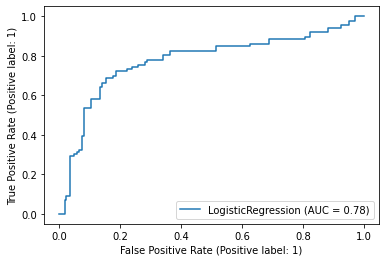

In [15]:
from sklearn import metrics
metrics.plot_roc_curve(mm,x_test,y_test)

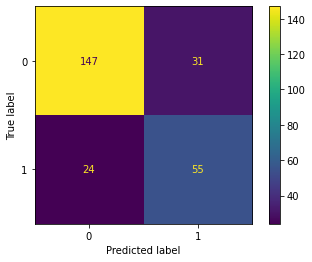

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(yp,y_test)
d=ConfusionMatrixDisplay(cm).plot()